In [22]:
import glob, os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [25]:
file = '/Volumes/home/Research/DataBase/08_GlobalSV_vel_ani/3D2018-08Sv-depth.nc'

In [26]:
df = nc.Dataset(file)

In [27]:
minlon = 30
maxlon = 60
minlat = 30
maxlat = 50

In [44]:
lon_s = 45 #45, 43
lat_s = 39 #43, 41


In [45]:
lat = df.variables['latitude'][:]
lon = df.variables['longitude'][:]
dVs = df.variables['dvs'][:]
dep = df.variables['depth'][:]
Ani = df.variables['az'][:]
Ans = df.variables['as'][:]

In [46]:
zoomlat=np.where(lat == lat_s)[0][0]
zoomlon=np.where(lon == lon_s)[0][0]


In [47]:
phi = Ani[:,zoomlat,zoomlon]
stg = Ans[:,zoomlat,zoomlon]
dvs = dVs[:,zoomlat,zoomlon]

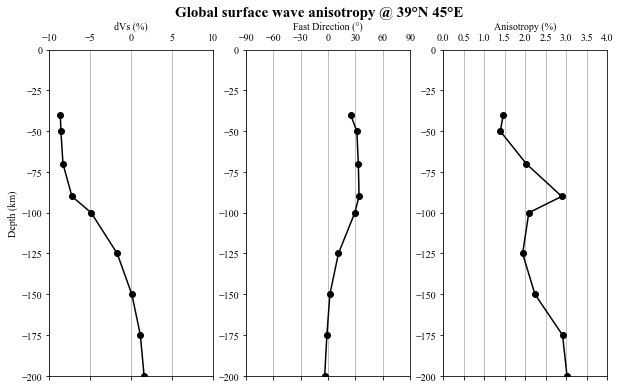

In [48]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(10,6))
ax = plt.subplot(131)
plt.plot(dvs,-dep,'o-',c='k')
plt.ylabel('Depth (km)')
plt.xlabel('dVs (%)')
plt.ylim(-200,0)
plt.xlim(-10,10)
plt.grid(axis='x')
ax.xaxis.set_label_position('top') 
ax.tick_params(labelbottom=False,labeltop=True)
ax = plt.subplot(132)
plt.plot(phi,-dep,'o-',c='k')
plt.xlim(-90,90)
plt.ylim(-200,0)
plt.xticks(range(-90,90+1,30))
plt.grid(axis='x')
plt.xlabel('Fast Direction (°)')
ax.xaxis.set_label_position('top') 
ax.tick_params(labelbottom=False,labeltop=True)
ax = plt.subplot(133)
plt.plot(stg,-dep,'o-',c='k')
plt.xticks(np.arange(0,4.1,0.5))
plt.xlim(0,4)
plt.ylim(-200,0)
plt.grid(axis='x')
ax.xaxis.set_label_position('top') 
ax.tick_params(labelbottom=False,labeltop=True)
plt.xlabel('Anisotropy (%)')

plt.suptitle(f'Global surface wave anisotropy @ {lat_s}°N {lon_s}°E', fontsize=15, fontweight='bold' )
plt.savefig(f'Global{lat_s}N{lon_s}E.png',dpi=150)
plt.savefig(f'Global{lat_s}N{lon_s}E.pdf')

## My model

In [63]:
Depth = [0,-40,-40,-200]
Phi = [45,45,65,65]
Strength = [1,1,1.4,1.4]
title = '08'

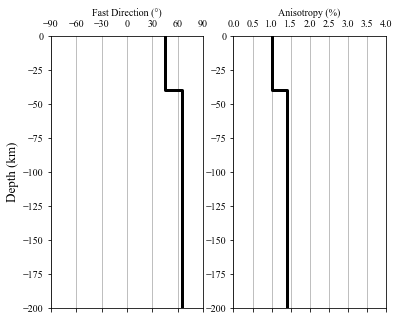

In [64]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(6,5))
ax = plt.subplot(121)
plt.plot(Phi,Depth,'k',lw=3)
plt.xlim(-90,90)
plt.ylim(-200,0)
plt.xticks(range(-90,90+1,30))
ax.xaxis.set_label_position('top') 
ax.tick_params(labelbottom=False,labeltop=True)
plt.xlabel('Fast Direction (°)')
plt.grid(axis='x')
plt.ylabel('Depth (km)',fontsize=13)


ax = plt.subplot(122)
plt.plot(Strength,Depth,'k',lw=3)
plt.xlim(0,4)
plt.ylim(-200,0)
plt.xticks(np.arange(0,4.1,0.5))
ax.xaxis.set_label_position('top') 
ax.tick_params(labelbottom=False,labeltop=True)
plt.xlabel('Anisotropy (%)')
plt.grid(axis='x')
plt.savefig(f'model_{title}.png',dpi=150)